In [1]:
from PIL import Image, ImageFont, ImageDraw, ImageFilter, ImageStat

from ChemPageSegmentationDatasetCreator import ChemPageSegmentationDatasetCreator as CPSD_creator

import numpy as np

## Generation of a single structure depiction with polygon coordinates around the chemical structure

In [2]:
smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
dataset_creator = CPSD_creator([smiles])


Bounding box expansion complete. 
 Step factor: 200
 Local center ratio: False


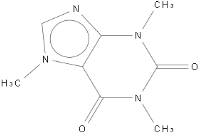

In [3]:
image, annotation = dataset_creator.generate_structure_and_annotation(smiles)
image

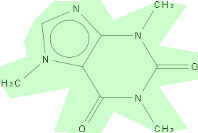

In [4]:
annotation
x_coords = annotation['regions'][0]['shape_attributes']['all_points_x']
y_coords = annotation['regions'][0]['shape_attributes']['all_points_y']
polygon = [(x_coords[n], y_coords[n]) for n in range(len(x_coords))]
draw = ImageDraw.Draw(image, 'RGBA')
draw.polygon(polygon, fill = (0,255,0,50))
image


## Generation of a single structure depiction and an ID label with polygon coordinates around both elements

In [5]:
image, annotation = dataset_creator.generate_structure_and_annotation(smiles, label=True)
image
annotation

Bounding box expansion complete. 
 Step factor: 200
 Local center ratio: False


{'filename': 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
 'regions': [{'region_attributes': {'type': 'chemical_structure'},
   'shape_attributes': {'name': 'polygon',
    'all_points_x': [74,
     58,
     38,
     11,
     0,
     0,
     13,
     0,
     2,
     20,
     59,
     61,
     75,
     89,
     106,
     134,
     151,
     157,
     163,
     122,
     151,
     136,
     101,
     88],
    'all_points_y': [0,
     0,
     5,
     17,
     45,
     72,
     92,
     113,
     138,
     160,
     130,
     179,
     203,
     181,
     170,
     166,
     140,
     113,
     93,
     80,
     46,
     18,
     29,
     6]}},
  {'region_attributes': {'type': 'chemical_ID'},
   'shape_attributes': {'name': 'polygon',
    'all_points_x': [197, 197, 218, 218],
    'all_points_y': [212, 224, 224, 212]}}]}

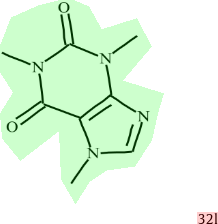

In [6]:
colour_dict = {
    'chemical_structure': (0,255,0,50),
    'chemical_ID': (255,0,0,50),
}
for region in annotation['regions']:
    x_coords = region['shape_attributes']['all_points_x']
    y_coords = region['shape_attributes']['all_points_y']
    polygon = [(x_coords[n], y_coords[n]) for n in range(len(x_coords))]
    draw = ImageDraw.Draw(image, 'RGBA')
    colour = colour_dict[region['region_attributes']['type']]
    draw.polygon(polygon, fill = colour)

image

Bounding box expansion complete. 
 Step factor: 200
 Local center ratio: False
Bounding box expansion complete. 
 Step factor: 200
 Local center ratio: False
Bounding box expansion complete. 
 Step factor: 200
 Local center ratio: False
Bounding box expansion complete. 
 Step factor: 200
 Local center ratio: False
Bounding box expansion complete. 
 Step factor: 200
 Local center ratio: False
[[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 ...

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
 

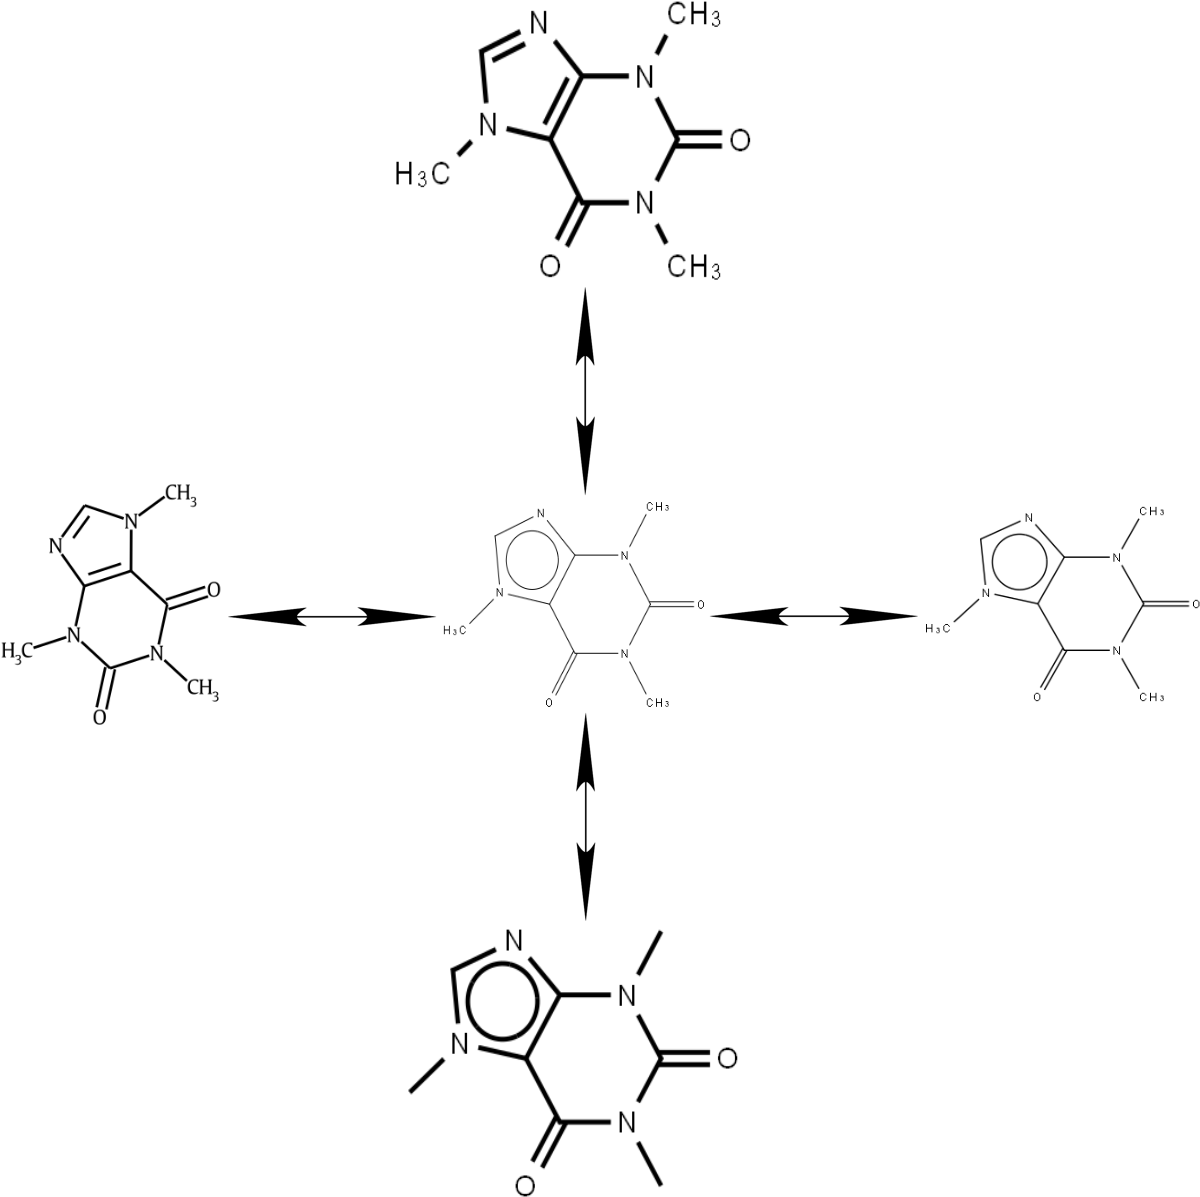

In [7]:
image, annotation = dataset_creator.create_reaction_scheme()
image

In [9]:
colour_dict = {
    'chemical_structure': (0,255,0,50),
    'chemical_ID': (255,0,0,50),
    'arrow': (0,0,255,50)
}
annotation
for region in annotation:
    x_coords = region['shape_attributes']['all_points_x']
    y_coords = region['shape_attributes']['all_points_y']
    polygon = [(x_coords[n], y_coords[n]) for n in range(len(x_coords)) if len]
    draw = ImageDraw.Draw(image, 'RGBA')
    colour = colour_dict[region['region_attributes']['type']]
    draw.polygon(polygon, fill = colour)

image

[(109, 483), (90, 498), (62, 499), (36, 523), (29, 559), (53, 591), (42, 604), (0, 630), (0, 665), (13, 708), (59, 713), (87, 725), (110, 725), (130, 714), (160, 713), (218, 722), (221, 672), (201, 623), (221, 603), (221, 577), (221, 535), (204, 492), (174, 483), (137, 483)]
[(574, 504), (547, 501), (514, 508), (485, 533), (474, 564), (475, 588), (442, 605), (442, 629), (462, 650), (535, 636), (515, 701), (547, 707), (574, 707), (591, 671), (648, 707), (690, 700), (651, 635), (700, 625), (704, 604), (700, 584), (649, 573), (690, 509), (647, 501), (592, 533)]
[(1063, 507), (1035, 505), (998, 510), (970, 536), (959, 566), (962, 589), (925, 604), (925, 628), (944, 648), (1022, 633), (1003, 694), (1035, 702), (1064, 702), (1082, 669), (1144, 702), (1186, 694), (1142, 632), (1196, 623), (1200, 604), (1196, 584), (1142, 575), (1183, 516), (1143, 505), (1082, 535)]
[(572, 0), (535, 0), (499, 26), (454, 48), (449, 91), (457, 121), (395, 141), (395, 173), (406, 207), (519, 183), (514, 233), (53

TypeError: coordinate list must contain at least 2 coordinates